<a href="https://colab.research.google.com/github/zsunberg/ai4all-berkeley-driving/blob/master/1-4%20Systematic%20Ways%20of%20Determining%20Policies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-4 Systematic Ways of Determining Policies

In this section, we introduce different methods and ideas that help us find a good policy.

Remember: a **policy** is a function where you input the *state* (location of the car on the road), and it gives you the next *action* to take (how much to turn in the next time step).

Let's set a few things up first: download the code, import the functions we need, and create the environment (the road and car).

In [ ]:
## Google Colab Code to get everything set up
! git clone https://github.com/zsunberg/ai4all-berkeley-driving
%cd ai4all-berkeley-driving/

# Get the Dependencies for the Colab Notebook
! pip install stable-baselines
! pip install celluloid
! pip install numpy==1.17.0

In [1]:
# Import the API for the Students
from driving.ui import *

# Create the environment
env = env_constructor()

## Short-Sighted Reward Function

First, we'll experiment with a greedy, short-sighted reward that only looks **one time step** into the future. It examines all actions we can take from our current position for the next step, and then simply takes the best one.

Below, fill in "greedy_policy" - it takes in the state of the car, and outputs the action that would maximize the reward in just the next time step.

You'll need to access the **reward function**, like this: `env.reward(x, y, theta, action)` where `action` is the turning angle that you're checking to see how good it is. You can see the reward function with `view_reward(env)` as shown below:

In [ ]:
view_reward(env)

You can access the list of possible turning angles by doing `env.actions`. Run the cell below to see what they are.

In [3]:
env.actions # Returns a list of turning angles

(-35.0, -20.0, -10.0, -5.0, 0.0, 5.0, 10.0, 20.0, 35.0)

In [4]:
# Student Code Here:

# Implement the policy that maximizes the reward at the current position and angle of the car
def greedy_policy(x,y,theta):
    # 1. create variables to keep track of best reward and action
    # 2. loop through actions
    #     3. for each action get reward
    #     4. if new reward is better than best reward, save reward and action
    # 5. return the best action
    pass

Now that you've made the single-step reward policy, let's see how it performs.

Run the cell below to see an animation using your policy. The car starts somewhere near the road, and chooses its next action based on the greedy policy.

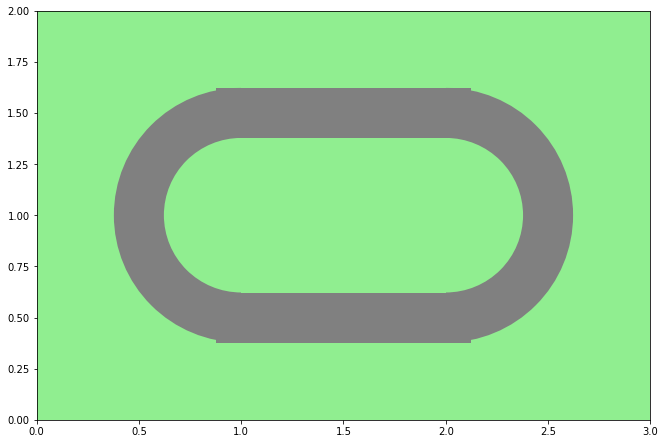

In [5]:
plot_episode(env, greedy_policy)

The cell below also runs your policy each time step, but lets you see the path that the car took in a static plot. The car starts at a different spot each time, so it won't match up with the above animation.

Note: an "episode" is just one run of the car starting somewhere, then repeatedly choosing actions until it stops (here, it stops when reaching a maximum number of time steps).

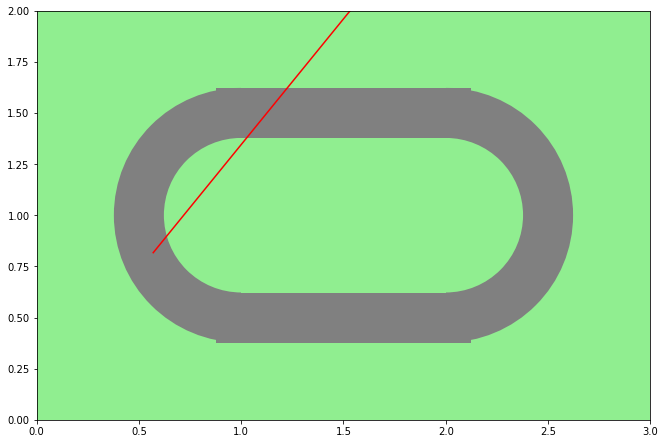

In [6]:
plot_episode(env, greedy_policy)

### What Went Wrong with Maximizing the Single-Step Reward?

## Better: Q-values
### Look further into the future to decide the best action to take right now.